<h1>Customer Personality Analysis</h1>

<h4>Author: Arya Sharma</h4>

<h4>Dataset: https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis/data</h4>

<h4>Research Question: To understand customer purchasing behavior by analyzing their demographic and behavioral attributes, and identify patterns that influence buying decisions. The insights aim to support targeted marketing strategies, enhance customer segmentation, and improve personalized recommendations.</h4>

<h2>Let's take a look at the dataset!</h2>

In [1]:
# cell explanation: loading in dataset into dataframe
import pandas as pd
data = pd.read_csv("marketing_campaign.csv", sep='\t', encoding='utf-8', on_bad_lines='skip')

In [2]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
# cell explanation: taking a look at all of the columns
data.columns.tolist()

['ID',
 'Year_Birth',
 'Education',
 'Marital_Status',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Z_CostContact',
 'Z_Revenue',
 'Response']

In [7]:
# cell explanation: taking a look at dimensions of the dataframe
data.shape

(2240, 29)

In [9]:
# cell explanation: looking at null values in columns
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

<h2>Let's clean up the dataset!</h2>

In [12]:
# cell explanation: imputing income with median values
data['Income'] = data['Income'].fillna(data['Income'].median())

In [14]:
# cell explanation: checking for duplicates
data.drop_duplicates(inplace=True)

In [16]:
# cell explanation: taking a look at categorical variables
print(data['Education'].unique())
print(data['Marital_Status'].unique())

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']


In [18]:
# cell explanation: creating consistency in our labels
data['Education'] = data['Education'].str.strip().str.title()

education_mapping = {
    'Graduation': 'Graduate',
    'Phd': 'Postgraduate',  
    'Master': 'Postgraduate',
    'Basic': 'Undergraduate',
    '2N Cycle': 'Undergraduate'  
}
data['Education'] = data['Education'].map(education_mapping)

marital_status_mapping = {
    'Single': 'Single',
    'Together': 'In a Relationship',
    'Married': 'In a Relationship',
    'Divorced': 'Divorced',
    'Widow': 'Widowed',
    'Alone': 'Single',
    'Absurd': 'Other',
    'YOLO': 'Other'
}
data['Marital_Status'] = data['Marital_Status'].map(marital_status_mapping)
data = data[~data['Marital_Status'].isin(['Absurd', 'YOLO'])]

In [20]:
# cell explanation: checking if our cleaning worked
print(data['Education'].unique())
print(data['Marital_Status'].unique())

['Graduate' 'Postgraduate' 'Undergraduate']
['Single' 'In a Relationship' 'Divorced' 'Widowed' 'Other']


In [22]:
# cell explanation: convert dates to datetime format
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [24]:
# cell explanation: taking a look at the dataframe after making changes
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduate,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduate,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduate,In a Relationship,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduate,In a Relationship,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Postgraduate,In a Relationship,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [26]:
# cell explanation: extracting the number of days since a customer joined
data.loc[:, 'Customer_For'] = (pd.Timestamp.now() - data['Dt_Customer']).dt.days

In [28]:
# cell explanation: looking at columns again
print(data.columns) 

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Customer_For'],
      dtype='object')


<h3>Feature Engineering</h3>

In [31]:
# cell explanation: combine Kidhome and Teenhome into a single feature called Children
data['Children'] = data['Kidhome'] + data['Teenhome']
data.drop(columns=['Kidhome', 'Teenhome'], inplace=True)

In [33]:
# cell explanation: adding a total spending column for the customers
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 
                    'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

data['Total_Spending'] = data[spending_columns].sum(axis=1)

In [37]:
# cell explanation: taking a look at the dataframe once again
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_For,Children,Total_Spending
0,5524,1957,Graduate,Single,58138.0,2012-09-04,58,635,88,546,...,0,0,0,0,3,11,1,4459,0,1617
1,2174,1954,Graduate,Single,46344.0,2014-03-08,38,11,1,6,...,0,0,0,0,3,11,0,3909,2,27
2,4141,1965,Graduate,In a Relationship,71613.0,2013-08-21,26,426,49,127,...,0,0,0,0,3,11,0,4108,0,776
3,6182,1984,Graduate,In a Relationship,26646.0,2014-02-10,26,11,4,20,...,0,0,0,0,3,11,0,3935,1,53
4,5324,1981,Postgraduate,In a Relationship,58293.0,2014-01-19,94,173,43,118,...,0,0,0,0,3,11,0,3957,1,422


<h3>Looking at Outliers</h3>

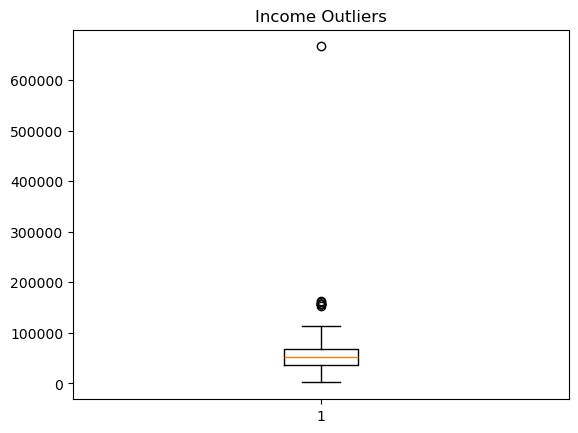

In [40]:
# cell explanation: boxplot for the income 
import matplotlib.pyplot as plt
plt.boxplot(data['Income'])
plt.title('Income Outliers')
plt.show()

The boxplot shows that most incomes are clustered within a small range, but there are a few extremely high outliers. These outliers stand out significantly from the rest of the data. Depending on the analysis, they might need to be handled to avoid skewing results.

In [42]:
# cell explanation: removing any extremes
q1 = data['Income'].quantile(0.25)
q3 = data['Income'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

data = data[(data['Income'] >= lower_bound) & (data['Income'] <= upper_bound)]

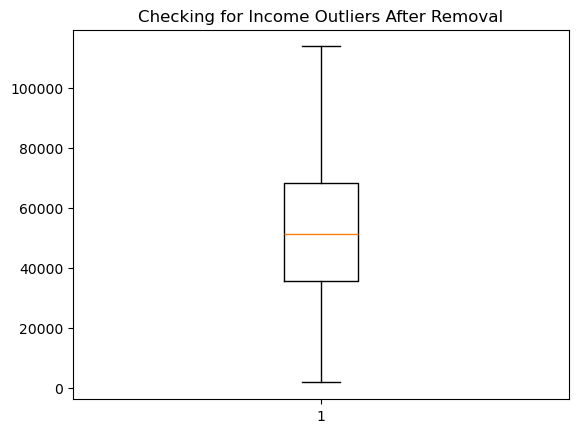

In [44]:
# cell explanation: plotting without outliers
plt.boxplot(data['Income'])
plt.title('Checking for Income Outliers After Removal')
plt.show()

In [46]:
# cell explanation: looking at the dataframe
print(data.info())  
print(data.isnull().sum())  
print(data.describe())  

<class 'pandas.core.frame.DataFrame'>
Index: 2232 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2232 non-null   int64         
 1   Year_Birth           2232 non-null   int64         
 2   Education            2232 non-null   object        
 3   Marital_Status       2232 non-null   object        
 4   Income               2232 non-null   float64       
 5   Dt_Customer          2232 non-null   datetime64[ns]
 6   Recency              2232 non-null   int64         
 7   MntWines             2232 non-null   int64         
 8   MntFruits            2232 non-null   int64         
 9   MntMeatProducts      2232 non-null   int64         
 10  MntFishProducts      2232 non-null   int64         
 11  MntSweetProducts     2232 non-null   int64         
 12  MntGoldProds         2232 non-null   int64         
 13  NumDealsPurchases    2232 non-null   i

<h2>Exploratory Data Analysis</h2>

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

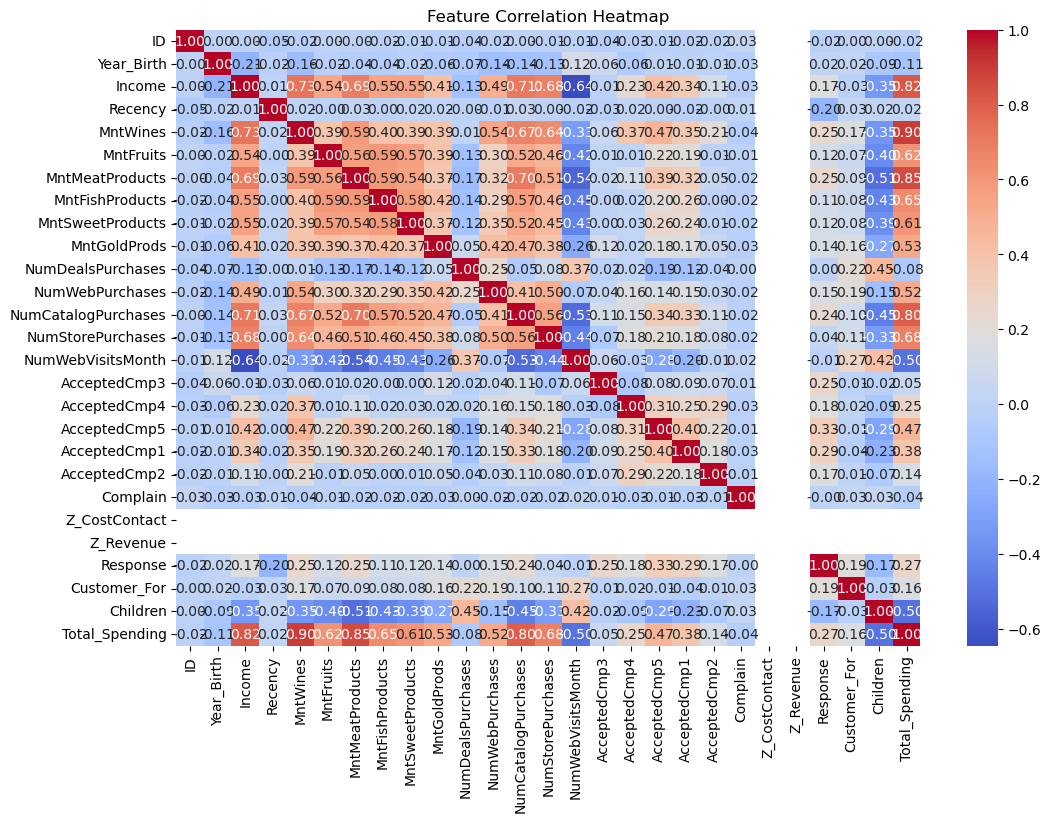

In [55]:
# cell explanation: creating a correlation heatmap to looks at different feature correlations
numeric_data = data.select_dtypes(include=['number'])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

The heatmap shows the correlations between features, with darker red indicating strong positive relationships and darker blue showing strong negative ones. Total spending is highly correlated with various purchase categories like MntMeatProducts and MntFishProducts, while demographic features like income and year of birth have weaker relationships. Most features are only moderately or weakly correlated, suggesting diverse influences on customer behavior.

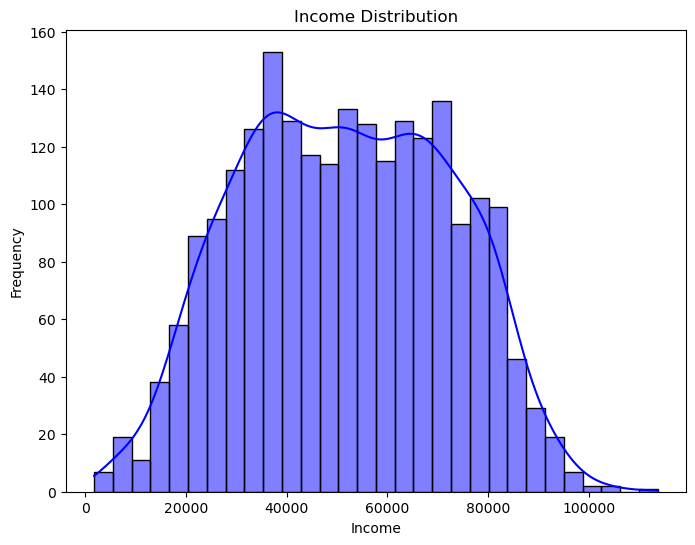

In [57]:
# cell explanation: looking at income
plt.figure(figsize=(8, 6))
sns.histplot(data['Income'], kde=True, bins=30, color='blue')
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

The histogram shows that income is fairly symmetrically distributed, with most customers earning between $40,000 and $60,000. There is a slight skew toward higher incomes, with fewer customers earning over $80,000. The distribution suggests a well balanced dataset for income analysis, with a slight concentration in the mid income range.

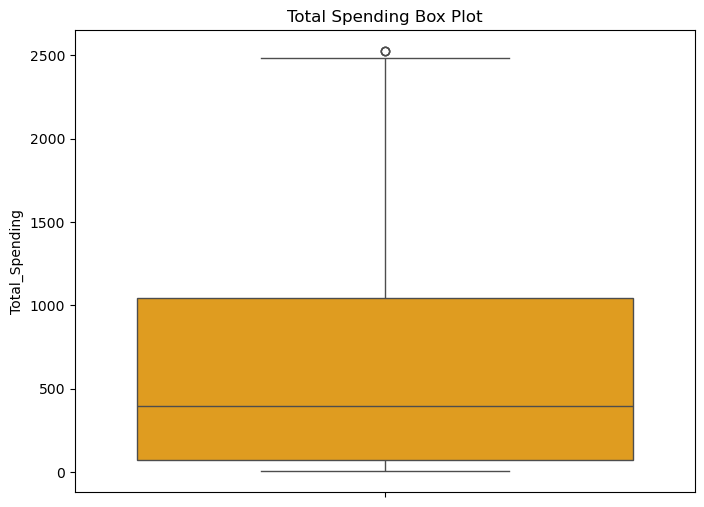

In [59]:
# cell explanation: looking at total spending
plt.figure(figsize=(8, 6))
sns.boxplot(data['Total_Spending'], color='orange')
plt.title('Total Spending Box Plot')
plt.show()

The boxplot shows that most customers' total spending falls between approximately 250 and 1,000 units, with a median close to 500. A few outliers exceed 2,500, but the majority of the data is concentrated within the interquartile range. This suggests a relatively consistent spending pattern among most customers, with some high spenders standing out.

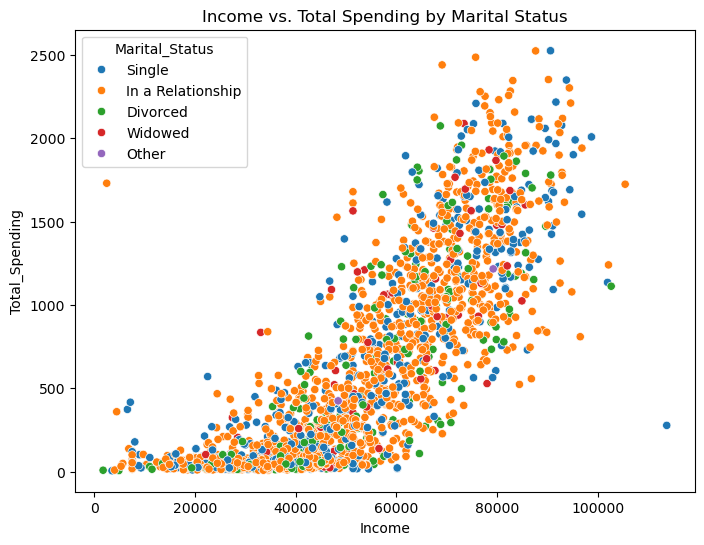

In [61]:
# cell explanation: income vs. total spending
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='Total_Spending', data=data, hue='Marital_Status')
plt.title('Income vs. Total Spending by Marital Status')
plt.show()

The scatter plot shows a positive relationship between income and total spending, with higher-income individuals generally spending more. Customers in relationships tend to dominate across all income levels, while other marital statuses are more evenly distributed. There’s variability in spending even among individuals with similar incomes, indicating other factors influence spending behavior.

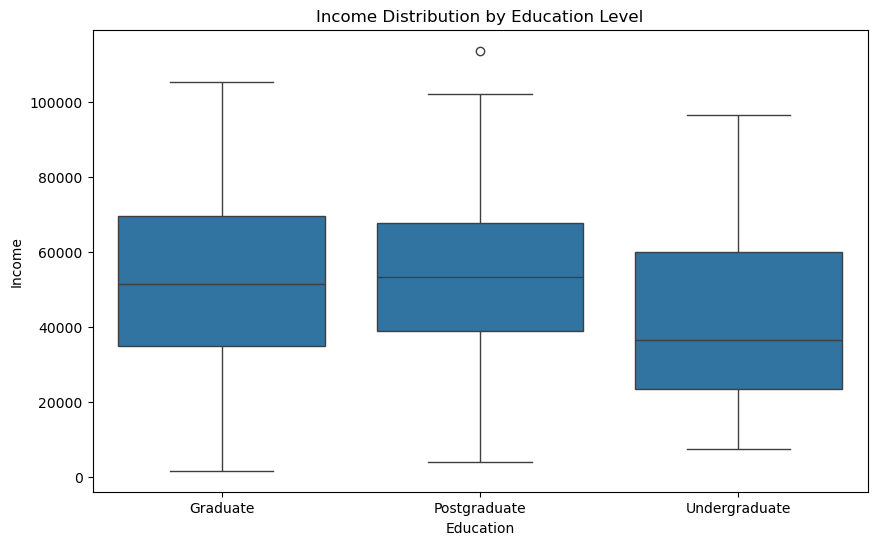

In [63]:
# cell explanation: income across education levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='Education', y='Income', data=data)
plt.title('Income Distribution by Education Level')
plt.show()

The boxplot shows that individuals with postgraduate and graduate education levels tend to have higher median incomes compared to those with undergraduate education. However, income variability is similar across all groups, with a few outliers at the higher end for postgraduates. Overall, higher education correlates with slightly higher income, but the difference is not dramatic.

C:\Users\nitin\AppData\Local\Temp\ipykernel_19244\3413297259.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Education', data=data, palette='Set2')


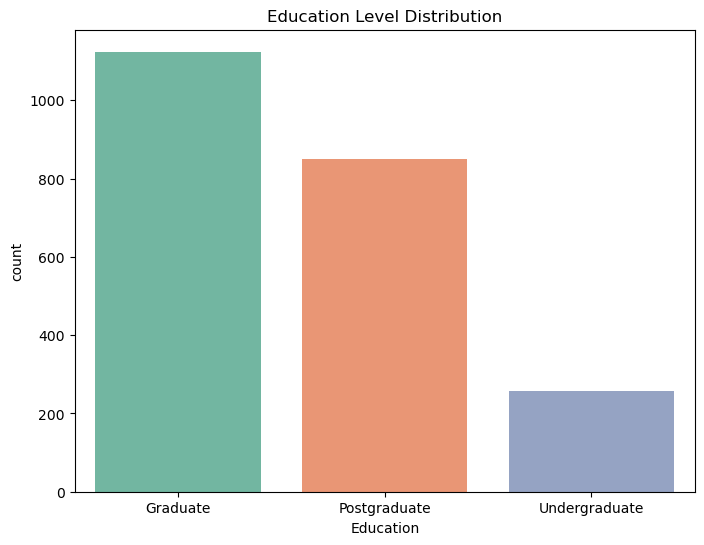

In [65]:
# cell explanation: looking at counts of different education levels
plt.figure(figsize=(8, 6))
sns.countplot(x='Education', data=data, palette='Set2')
plt.title('Education Level Distribution')
plt.show()

The bar chart shows that the majority of customers have a graduate education, followed by postgraduates, while undergraduates make up the smallest group. This indicates that most customers in the dataset have at least a graduate-level education. The distribution suggests a customer base that is predominantly well educated.

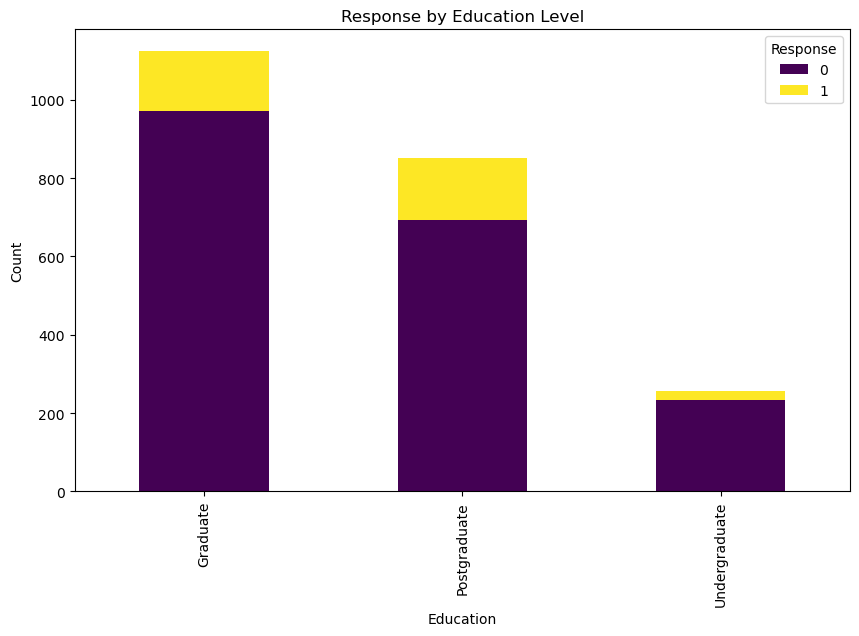

In [67]:
# cell explanation: looking at response by education level
response_education = data.groupby(['Education', 'Response']).size().unstack()
response_education.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Response by Education Level')
plt.xlabel('Education')
plt.ylabel('Count')
plt.show()

The stacked bar chart shows that graduates and postgraduates account for the majority of responses, with graduates having the highest overall count. While both groups include a significant number of positive responses (yellow), the proportion of positive responses appears similar across all education levels. Undergraduates have the smallest representation, with a relatively small share of positive responses.

C:\Users\nitin\AppData\Local\Temp\ipykernel_19244\3111125895.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Response', data=data, palette='Set2')


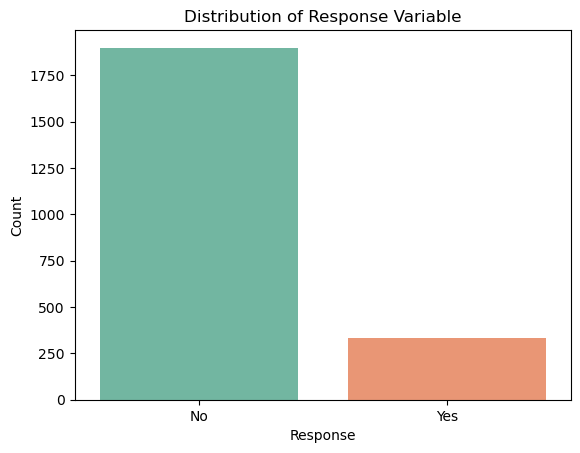

In [85]:
# cell explanation: looking at the distribution of response variable
sns.countplot(x='Response', data=data, palette='Set2')
plt.title('Distribution of Response Variable')
plt.xlabel('Response')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

The bar chart indicates that the majority of customers did not respond positively to the campaign, with significantly fewer positive responses ("Yes"). This imbalance suggests a heavily skewed response distribution, which might require special handling in modeling, such as balancing techniques or adjusted evaluation metrics.

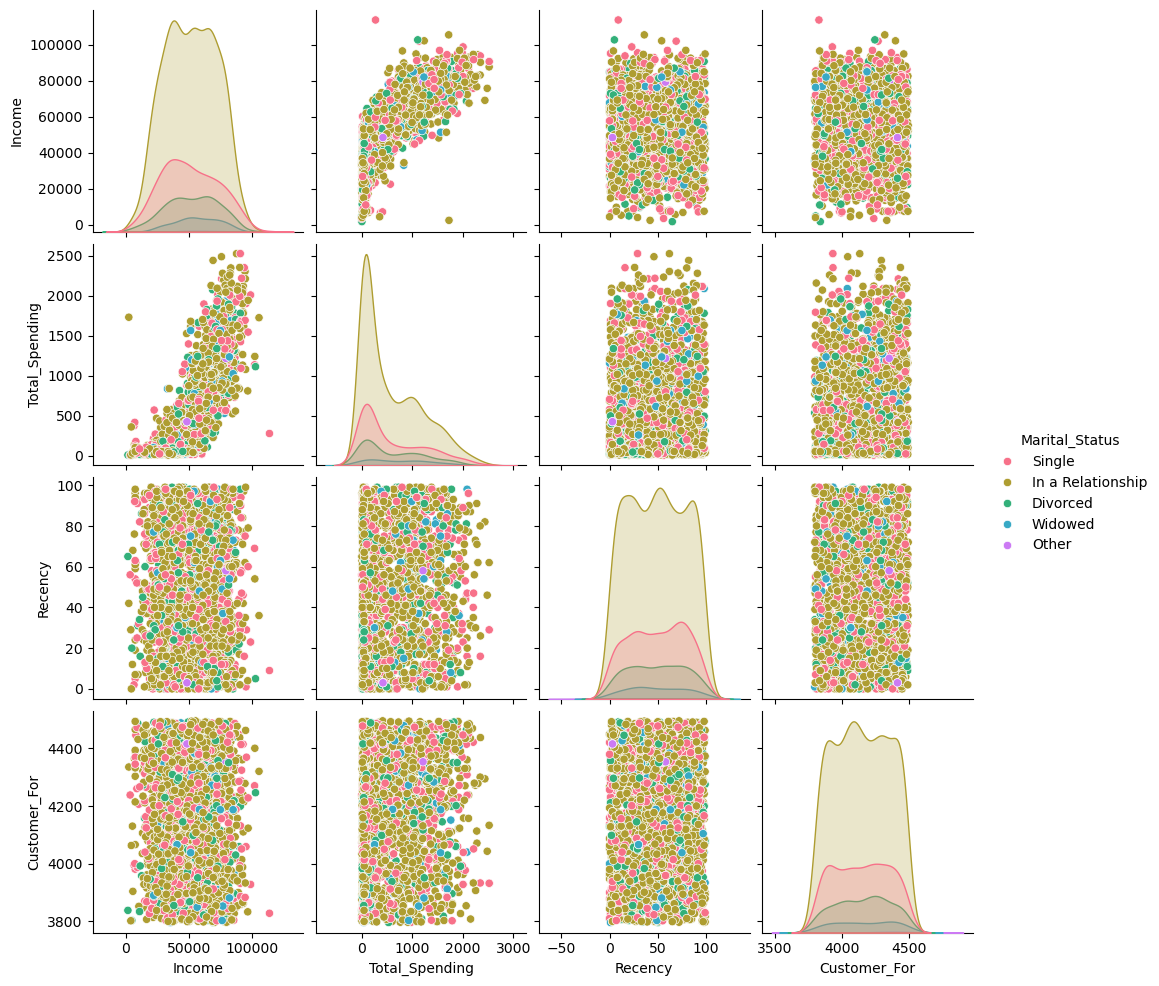

In [70]:
# cell explanation: looking at pairplots for different features
sns.pairplot(data, vars=['Income', 'Total_Spending', 'Recency', 'Customer_For'], hue='Marital_Status', palette='husl')
plt.show()

The pair plot shows relationships between key features such as income, total spending, recency, and customer tenure, segmented by marital status. A positive correlation is evident between income and total spending, with higher-income customers spending more. Recency and customer tenure show no clear patterns with income or spending, indicating minimal influence on these features. The distribution of marital statuses is evenly spread across all relationships, with no significant concentration in any specific group.

<h3>Standardization</h3>

In [73]:
# cell explanation: standardizing features
from sklearn.preprocessing import StandardScaler
features = ['Income', 'Total_Spending', 'Recency', 'Customer_For', 'Children']
scaler = StandardScaler()
X = scaler.fit_transform(data[features])

<h3>Clustering</h3>

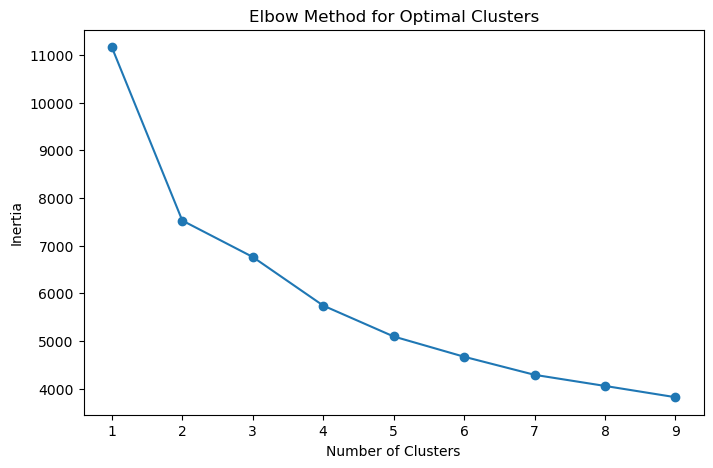

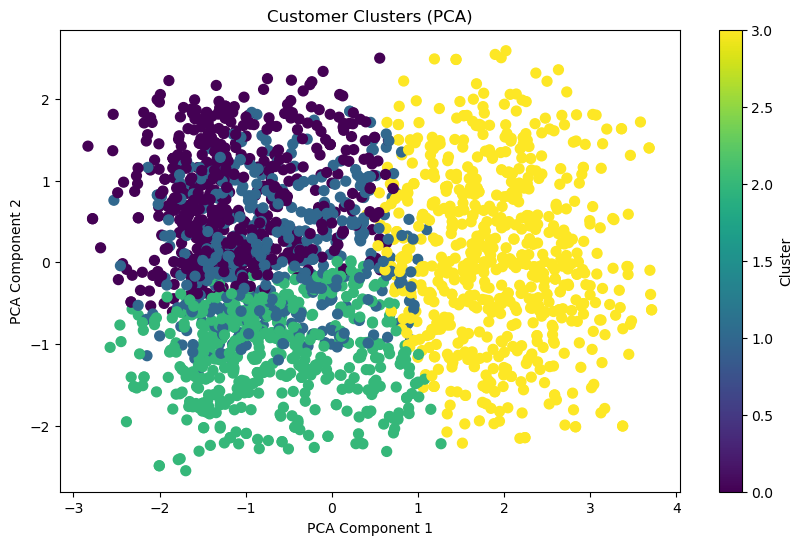

In [76]:
# cell explanation: using the elbow method to find the correct # of clusters, as well as creating cluster plot on PCA plot
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
kmeans = KMeans(n_clusters=4, random_state=42)
data['Cluster'] = kmeans.fit_predict(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.title('Customer Clusters (PCA)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

The elbow method plot shows a sharp decrease in inertia as the number of clusters increases, with a noticeable "elbow" around 3 or 4 clusters. This indicates that dividing the data into 3 or 4 clusters may provide the best balance between simplicity and explanatory power. Beyond 4 clusters, the reduction in inertia becomes more gradual, suggesting diminishing returns in clustering quality.

The PCA plot visualizes the customer clusters in a 2D space, showing distinct groupings of customers based on the clustering algorithm. Each color represents a different cluster, with noticeable separation, particularly between clusters on the right (yellow) and those on the left (purple, green, and blue). This indicates that the clustering algorithm successfully grouped customers with similar behaviors or attributes into distinct clusters.

<h3>Classification Model</h3>

<h4>Model to predict key customer behaviors, such as Response</h4>

In [81]:
# cell explanation: using random forest classifier to try and classify response of customers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
target = 'Response'
X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       378
           1       0.48      0.29      0.36        69

    accuracy                           0.84       447
   macro avg       0.68      0.62      0.63       447
weighted avg       0.82      0.84      0.82       447

ROC-AUC: 0.799401886358408


Model results show good performance in terms of accuracy and weighted averages, but the performance for the minority class (1, customers who responded to the campaign) is weaker. This is due to class imbalance.
- Precision of 0.88 means the model is very good at identifying non-responders correctly
- Recall of 0.29 means the model struggles to identify customers who responded correctly
- Likely means imbalanced dataset

In [90]:
# cell explanation: using SMOTE to address imbalance in dataset
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [94]:
# cell explanation: train random forest with balanced data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [96]:
# cell explanation: make predictions using test data
y_pred = rf.predict(X_test)
y_pred_proba = rf.predict_proba(X_test)[:, 1]

In [98]:
# cell explanation: evaluating classification model
print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

              precision    recall  f1-score   support

           0       0.90      0.83      0.87       378
           1       0.35      0.51      0.42        69

    accuracy                           0.78       447
   macro avg       0.63      0.67      0.64       447
weighted avg       0.82      0.78      0.80       447

ROC-AUC: 0.7901426270991487


In [103]:
# cell explanation: try adjusting threshold
y_pred_proba = rf.predict_proba(X_test)[:, 1]
threshold = 0.4
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_adjusted))

              precision    recall  f1-score   support

           0       0.92      0.78      0.84       378
           1       0.33      0.61      0.43        69

    accuracy                           0.75       447
   macro avg       0.62      0.69      0.63       447
weighted avg       0.83      0.75      0.78       447



In [105]:
# cell explanation: trying to find optimal threshold
from sklearn.metrics import precision_recall_curve
y_pred_proba = rf.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_idx = f1_scores.argmax()
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold}")
print(f"Precision: {precision[optimal_idx]:.2f}, Recall: {recall[optimal_idx]:.2f}, F1-Score: {f1_scores[optimal_idx]:.2f}")
y_pred_adjusted = (y_pred_proba >= optimal_threshold).astype(int)
print(classification_report(y_test, y_pred_adjusted))

Optimal Threshold: 0.37
Precision: 0.33, Recall: 0.70, F1-Score: 0.45
              precision    recall  f1-score   support

           0       0.93      0.74      0.83       378
           1       0.33      0.70      0.45        69

    accuracy                           0.74       447
   macro avg       0.63      0.72      0.64       447
weighted avg       0.84      0.74      0.77       447



This model is best for reaching as many potential customers as possible, since it has the highest recall. 
These are the following use cases for the model
- Target Marketing Campaigns (identify customers more likely to respond to marketing offers)
- Clustering helps with Customer Segmentation for campaign personalization
- Budget Allocation to targer those more likely to respond to campaigns

<h3>Cluster Analysis</h3>

In [83]:
# cell explanation: analyze the different clusters
cluster_profiles = data.groupby('Cluster')[features].mean()
print(cluster_profiles)

               Income  Total_Spending    Recency  Customer_For  Children
Cluster                                                                 
0        41945.551601      180.393238  48.893238   3929.487544  1.343416
1        40315.424242      317.115152  21.515152   4265.545455  1.062626
2        42751.627953      357.190945  75.836614   4266.742126  1.269685
3        74951.824588     1367.143928  49.419790   4159.692654  0.296852


The clustering analysis identifies four distinct customer profiles. 
- Cluster 0 has the lowest income and spending, but moderate recency and slightly more children. 
- Cluster 1 and 2 represent low to moderate income groups with Cluster 1 showing higher engagement and Cluster 2 having the highest recency.
- Cluster 3 stands out with the highest income and spending with moderate recency and the fewest children.